In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training_data_expense_forecast.csv to training_data_expense_forecast.csv


In [ ]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('training_data_expense_forecast.csv')

# Preview the data
df.head()


company_id  group_name           account_name        date  debit_amount  \
0     7S4LET  Operations   Bank Service Charges  22-03-2022   1880.722981   
1     7S4LET   Ungrouped                   Rent  27-10-2022   2104.209501   
2     7S4LET          HR   Miscellaneous Income  28-12-2022   4992.755927   
3     7S4LET          HR          FX Gain/ Loss  19-11-2023    476.002770   
4     7S4LET  Operations  Miscellaneous Expense  20-10-2022   3320.140989   

   credit  
0   406.0  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Load the CSV
df = pd.read_csv('training_data_expense_forecast.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Ensure numeric values and fill NaNs
df['debit_amount'] = pd.to_numeric(df['debit_amount'], errors='coerce').fillna(0)
df['credit'] = pd.to_numeric(df['credit'], errors='coerce').fillna(0)

# Subtract credit from debit to get actual spending
df['net_expense'] = df['debit_amount'] - df['credit']

# Set the date as the index
df.set_index('date', inplace=True)

# Resample to monthly sums
monthly_expense = df['net_expense'].resample('M').sum()

# Train-test split (e.g., 80% train, 20% test)
split_index = int(len(monthly_expense) * 0.8)
train_data = monthly_expense[:split_index]
test_data = monthly_expense[split_index:]

# ADF test on the training set
result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
df.head()


ADF Statistic: -3.7616905523859843
p-value: 0.003324510832136397


<ipython-input-4-a01ec59a1deb>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-4-a01ec59a1deb>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_expense = df['net_expense'].resample('M').sum()


company_id  group_name           account_name  debit_amount  \
date                                                                     
2022-03-22     7S4LET  Operations   Bank Service Charges   1880.722981   
2022-10-27     7S4LET   Ungrouped                   Rent   2104.209501   
2022-12-28     7S4LET          HR   Miscellaneous Income   4992.755927   
2023-11-19     7S4LET          HR          FX Gain/ Loss    476.002770   
2022-10-20     7S4LET  Operations  Miscellaneous Expense   3320.140989   

            credit  net_expense  
date                             
2022-03-22   406.0  1474.722981  
2022-10-27     0.0  2104.209501  
2022-12-28     0.0  4992.755927  
2023-11-19     0.0   476.002770  
2022-10-20     0.0  3320.140989

In [ ]:
df = df[df['net_expense'] >= 0]


In [ ]:
from scipy.stats import zscore
df['z'] = zscore(df['net_expense'])
df = df[df['z'].abs() < 3]  # Keep only values within 3 standard deviations
df.drop(columns='z', inplace=True)


In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.24.4 pmdarima==2.0.4 --no-cache-dir


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.3/17.3 MB 259.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.2/2.2 MB 288.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

Augmented Dickey-Fuller Test (ADF) to check stationarity:

If p-value > 0.05 ‚ûú Not stationary ‚Üí needs differencing

If p-value < 0.05 ‚ûú Stationary ‚Üí you're good to go

<ipython-input-2-8095f32c5864>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('training_data_expense_forecast.csv', parse_dates=['date'])
<ipython-input-2-8095f32c5864>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_expense = df['net_expense'].resample('M').sum()


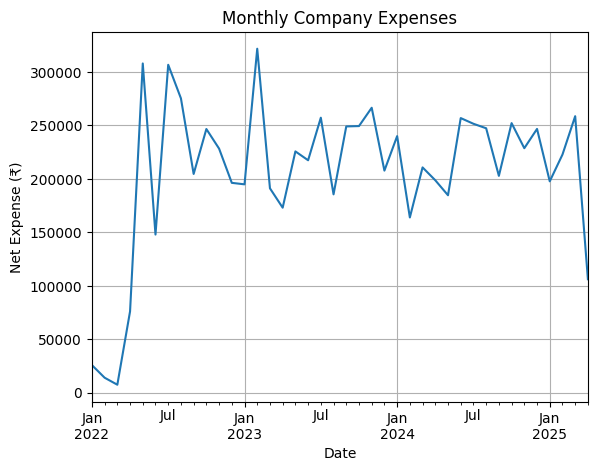

ADF Statistic: -3.7616905523859843
p-value: 0.003324510832136397
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=815.287, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=811.925, Time=0.30 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=845.073, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=879.537, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=810.177, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=812.152, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=813.721, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=814.358, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=833.080, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=843.097, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=828.237, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=815.688, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.527 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -402.088
Date:                Thu, 24 Apr 2025   AIC                            810.177
Time:                        17:59:34   BIC                            814.574
Sample:                    01-31-2022   HQIC                           811.634
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Load and clean data
df = pd.read_csv('training_data_expense_forecast.csv', parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df['debit_amount'] = pd.to_numeric(df['debit_amount'], errors='coerce').fillna(0)
df['credit'] = pd.to_numeric(df.get('credit', 0), errors='coerce').fillna(0)

# Compute net expense
df['net_expense'] = df['debit_amount'] - df['credit']

# Set date as index
df.set_index('date', inplace=True)

# Resample to monthly data
monthly_expense = df['net_expense'].resample('M').sum()

# Plot the time series
monthly_expense.plot(title="Monthly Company Expenses")
plt.ylabel("Net Expense (‚Çπ)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Train-test split (80% train, 20% test)
split_index = int(len(monthly_expense) * 0.8)
train_data = monthly_expense[:split_index]
test_data = monthly_expense[split_index:]

# ADF test on training set
result = adfuller(train_data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Train auto_arima on train_data only
model = auto_arima(
    train_data,
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Show model summary
print(model.summary())

In [ ]:
import pandas as pd
import numpy as np

# Add date features
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['quarter'] = df.index.quarter
df['is_month_end'] = df.index.is_month_end
df['is_quarter_end'] = df.index.month.isin([3, 6, 9, 12])
df['is_half_year_end'] = df.index.month.isin([6, 12])
df['is_fy_end'] = df.index.month == 12

# Custom fiscal period
def fiscal_periods(date):
    fiscal_year = date.year
    fiscal_quarter = (date.month - 1) // 3 + 1
    fiscal_half = 1 if date.month <= 6 else 2
    return pd.Series([fiscal_year, fiscal_quarter, fiscal_half], index=['fiscal_year', 'fiscal_quarter', 'fiscal_half'])

df[['fiscal_year', 'fiscal_quarter', 'fiscal_half']] = df.index.to_series().apply(fiscal_periods)

# Add income flag
df['is_income'] = df['credit'] > 0

# Monthly transaction volume
df['transaction_volume'] = 1
# Grouped monthly data
monthly_df = df.groupby([pd.Grouper(freq='MS'), 'group_name', 'account_name']).agg({
    'net_expense': 'sum',
    'transaction_volume': 'sum',
    'is_income': 'sum'
}).reset_index()

# Create a helper to compute rolling + lag
def add_lag_features(group):
    group = group.sort_values('date')  # Ensure sorted by time
    group['lag_1'] = group['net_expense'].shift(1)
    group['lag_2'] = group['net_expense'].shift(2)
    group['rolling_mean_3'] = group['net_expense'].rolling(3).mean()
    group['rolling_std_3'] = group['net_expense'].rolling(3).std()
    return group

# Apply to each group_name + account_name
monthly_df = monthly_df.groupby(['group_name', 'account_name']).apply(add_lag_features).reset_index(drop=True)

<ipython-input-10-4b1bc502226f>:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_df = monthly_df.groupby(['group_name', 'account_name']).apply(add_lag_features).reset_index(drop=True)


üìä 1. Net Expense + 3-Month Rolling Mean
What it shows:

Actual monthly spending vs. a smoothed average trend.

Why it‚Äôs useful:

Helps identify spikes or dips in expenses.

The rolling mean removes short-term noise ‚Üí gives a clearer long-term trend.

Management can forecast better and avoid over-reaction to one-off anomalies.

Business use case:

"Why was February 2024's expense 3x the average? Was it an annual license fee? Should we plan for it again next year?"

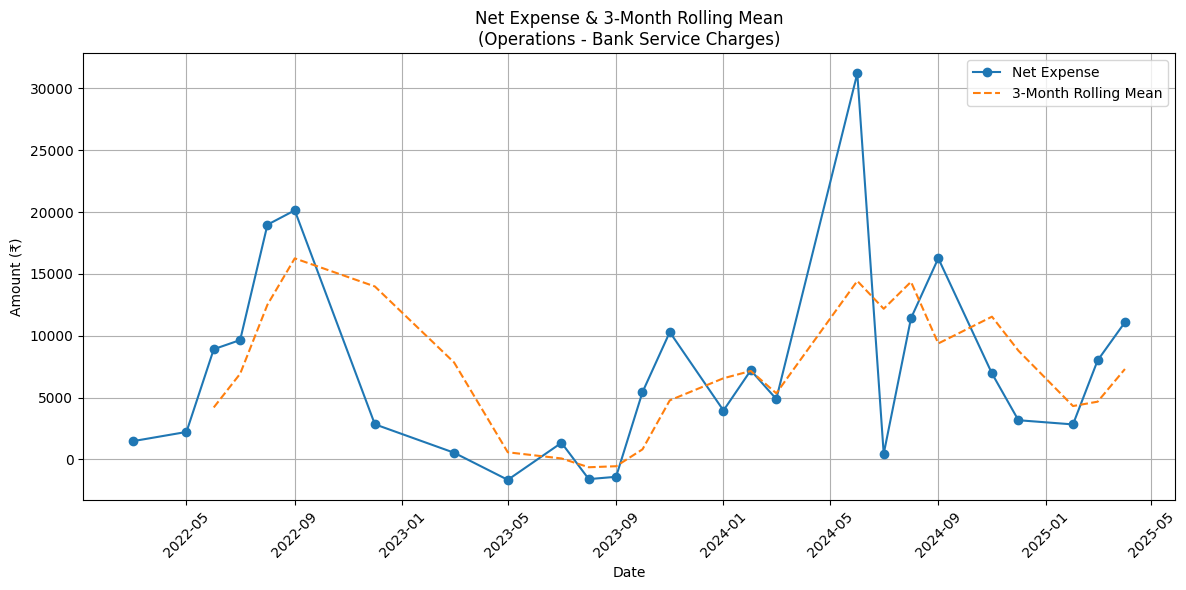

In [ ]:
import matplotlib.pyplot as plt

# Example: Plot for one group_name + account_name
sample_df = monthly_df[(monthly_df['group_name'] == 'Operations') & (monthly_df['account_name'] == 'Bank Service Charges')]

plt.figure(figsize=(12, 6))
plt.plot(sample_df['date'], sample_df['net_expense'], label='Net Expense', marker='o')
plt.plot(sample_df['date'], sample_df['rolling_mean_3'], label='3-Month Rolling Mean', linestyle='--')
plt.title('Net Expense & 3-Month Rolling Mean\n(Operations - Bank Service Charges)')
plt.xlabel('Date')
plt.ylabel('Amount (‚Çπ)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


üìà 2. Transaction Volume Over Time
What it shows:

Number of individual transactions per month.

Why it‚Äôs useful:

Explains sudden cost increases (many small transactions vs. one large).

Flags operational inefficiencies ‚Äî too many small expenses may need consolidation.

Helpful in fraud detection ‚Äî unexpected spikes in transaction count can be suspicious.

Business use case:

"April had the same expense as March, but 3x the transactions. Are we splitting purchases unnecessarily?"

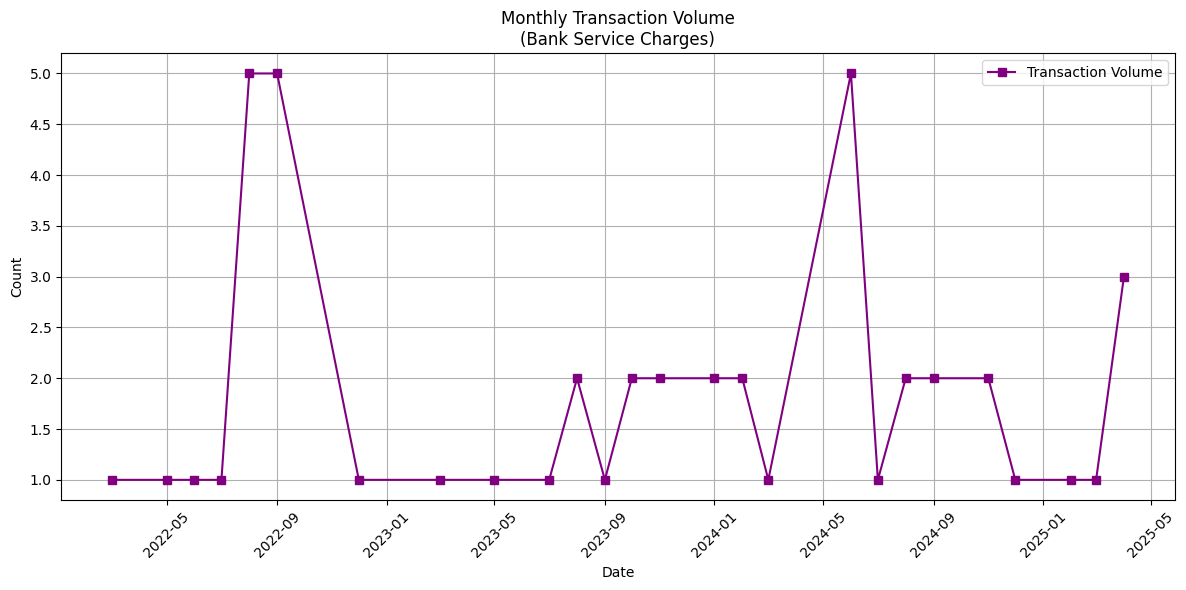

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sample_df['date'], sample_df['transaction_volume'], label='Transaction Volume', color='purple', marker='s')
plt.title('Monthly Transaction Volume\n(Bank Service Charges)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


üìâ 3. Rolling Standard Deviation (Volatility)
What it shows:

Fluctuation level in monthly expenses ‚Äî higher std dev = less predictable.

Why it‚Äôs useful:

Helps assess expense consistency.

Departments with high volatility might need stricter budgets or contingency funds.

Can prioritize risk management.

Business use case:

"HR department expenses are unpredictable. We should consider a buffer or a cap."

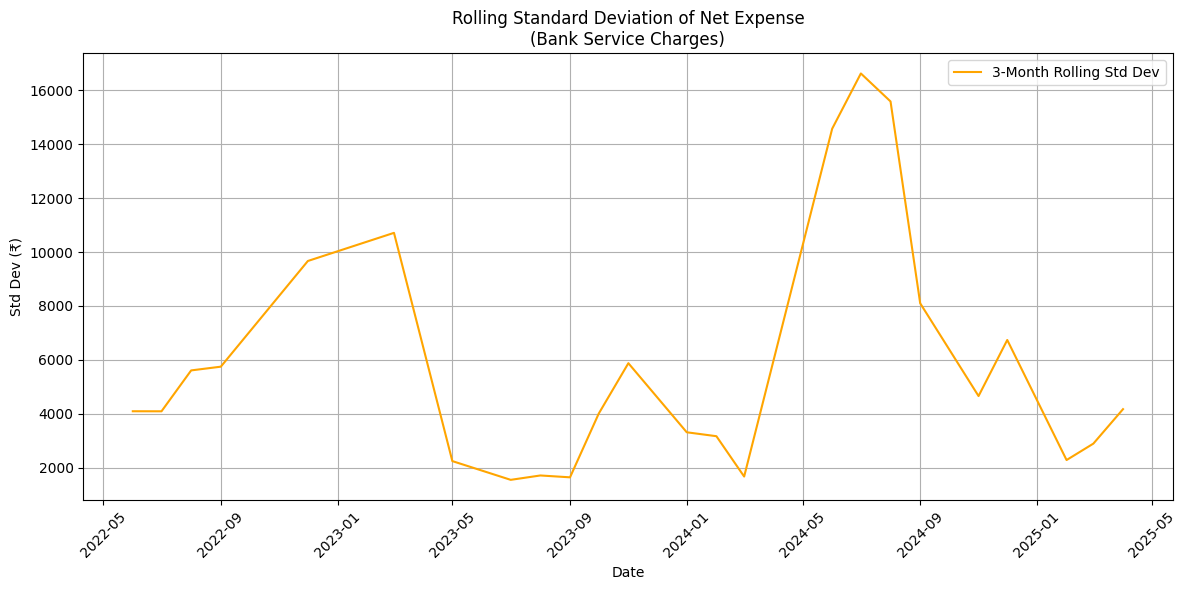

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sample_df['date'], sample_df['rolling_std_3'], label='3-Month Rolling Std Dev', color='orange')
plt.title('Rolling Standard Deviation of Net Expense\n(Bank Service Charges)')
plt.xlabel('Date')
plt.ylabel('Std Dev (‚Çπ)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ACF/PACF and trend analysis workflow

In [ ]:
# Example: Filter for "Operations" - "Bank Service Charges"
filtered_df = monthly_df[
    (monthly_df['group_name'] == 'Operations') &
    (monthly_df['account_name'] == 'Bank Service Charges')
].copy()

# Set date as index
filtered_df.set_index('date', inplace=True)

# Make sure index is sorted
filtered_df = filtered_df.sort_index()


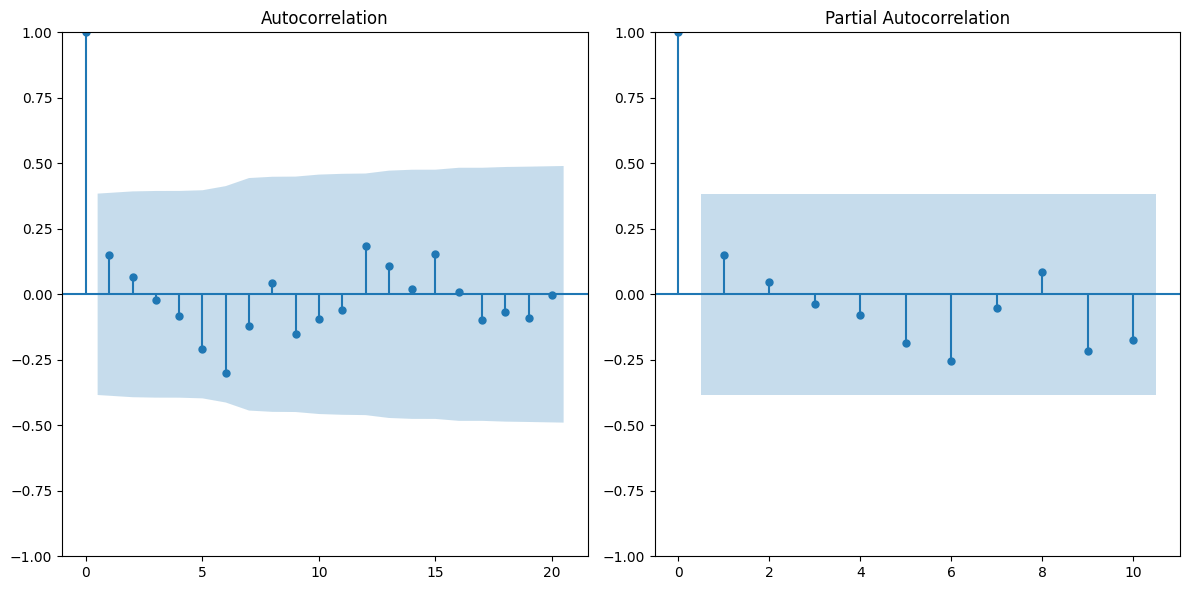

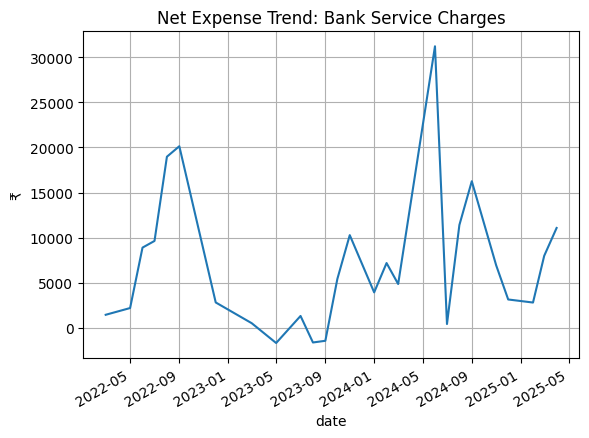

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check if enough data points
n = len(filtered_df)
if n >= 5:  # ensure you have enough data
    plt.figure(figsize=(12, 6))

    # ACF Plot
    plt.subplot(121)
    plot_acf(filtered_df['net_expense'], ax=plt.gca(), lags=min(n-1, 20))

    # PACF Plot
    plt.subplot(122)
    plot_pacf(filtered_df['net_expense'], ax=plt.gca(), lags=min(n // 2, 10))

    plt.tight_layout()
    plt.show()

    # Trend Line
    filtered_df['net_expense'].plot(title=f"Net Expense Trend: {filtered_df['account_name'].iloc[0]}")
    plt.ylabel("‚Çπ")
    plt.grid(True)
    plt.show()
else:
    print("Not enough data points for ACF/PACF.")


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMAX model with the chosen parameters
model = SARIMAX(
    filtered_df['net_expense'],
    order=(1, 1, 1),            # ARIMA part (p=1, d=1, q=1)
    seasonal_order=(1, 1, 1, 12) # Seasonal part (P=1, D=1, Q=1, s=12 for yearly seasonality)
)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

                                     SARIMAX Results                                      
Dep. Variable:                        net_expense   No. Observations:                   26
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -133.356
Date:                            Thu, 24 Apr 2025   AIC                            276.711
Time:                                    18:37:25   BIC                            279.536
Sample:                                         0   HQIC                           276.131
                                             - 26                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3140      0.705     -0.445      0.656      -1.696       1.068
ma.L1         -0.9740      3.286   

1. Monthly Forecasting (next few months)
You can forecast the next few months by using the forecast function. For example, to forecast the next 3 months:

In [ ]:
# Forecast for the next 3 months
monthly_forecast = results.forecast(steps=1)
print("Monthly Forecast for Next Month:", monthly_forecast)


Monthly Forecast for Next Month: 26    12832.070021
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2. Quarterly Forecasting
To forecast for the next quarter (3 months), you can specify steps=3:

In [ ]:
# Quarterly forecast (next 3 months)
quarterly_forecast = results.forecast(steps=3)
print("Quarterly Forecast:", quarterly_forecast)


Quarterly Forecast: 26    12832.070021
27    15113.895308
28    20978.528306
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3. Half-Yearly Forecasting (Next 6 months)
For half-yearly forecasting, you can forecast for the next 6 months:

In [ ]:
# Half-yearly forecast (next 6 months)
half_yearly_forecast = results.forecast(steps=6)
print("Half-Yearly Forecast:", half_yearly_forecast)


Half-Yearly Forecast: 26    12832.070021
27    15113.895308
28    20978.528306
29    37689.641038
30     5664.729121
31    10598.514243
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


4. Yearly Forecasting (Next 12 months)
For forecasting one year ahead (12 months):

In [ ]:
# Yearly forecast (next 12 months)
yearly_forecast = results.forecast(steps=12)
print("Yearly Forecast:", yearly_forecast)


Yearly Forecast: 26    12832.070021
27    15113.895308
28    20978.528306
29    37689.641038
30     5664.729121
31    10598.514243
32    11837.844380
33     8947.259602
34     3779.417488
35     6003.196171
36    12864.825965
37    17489.678119
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


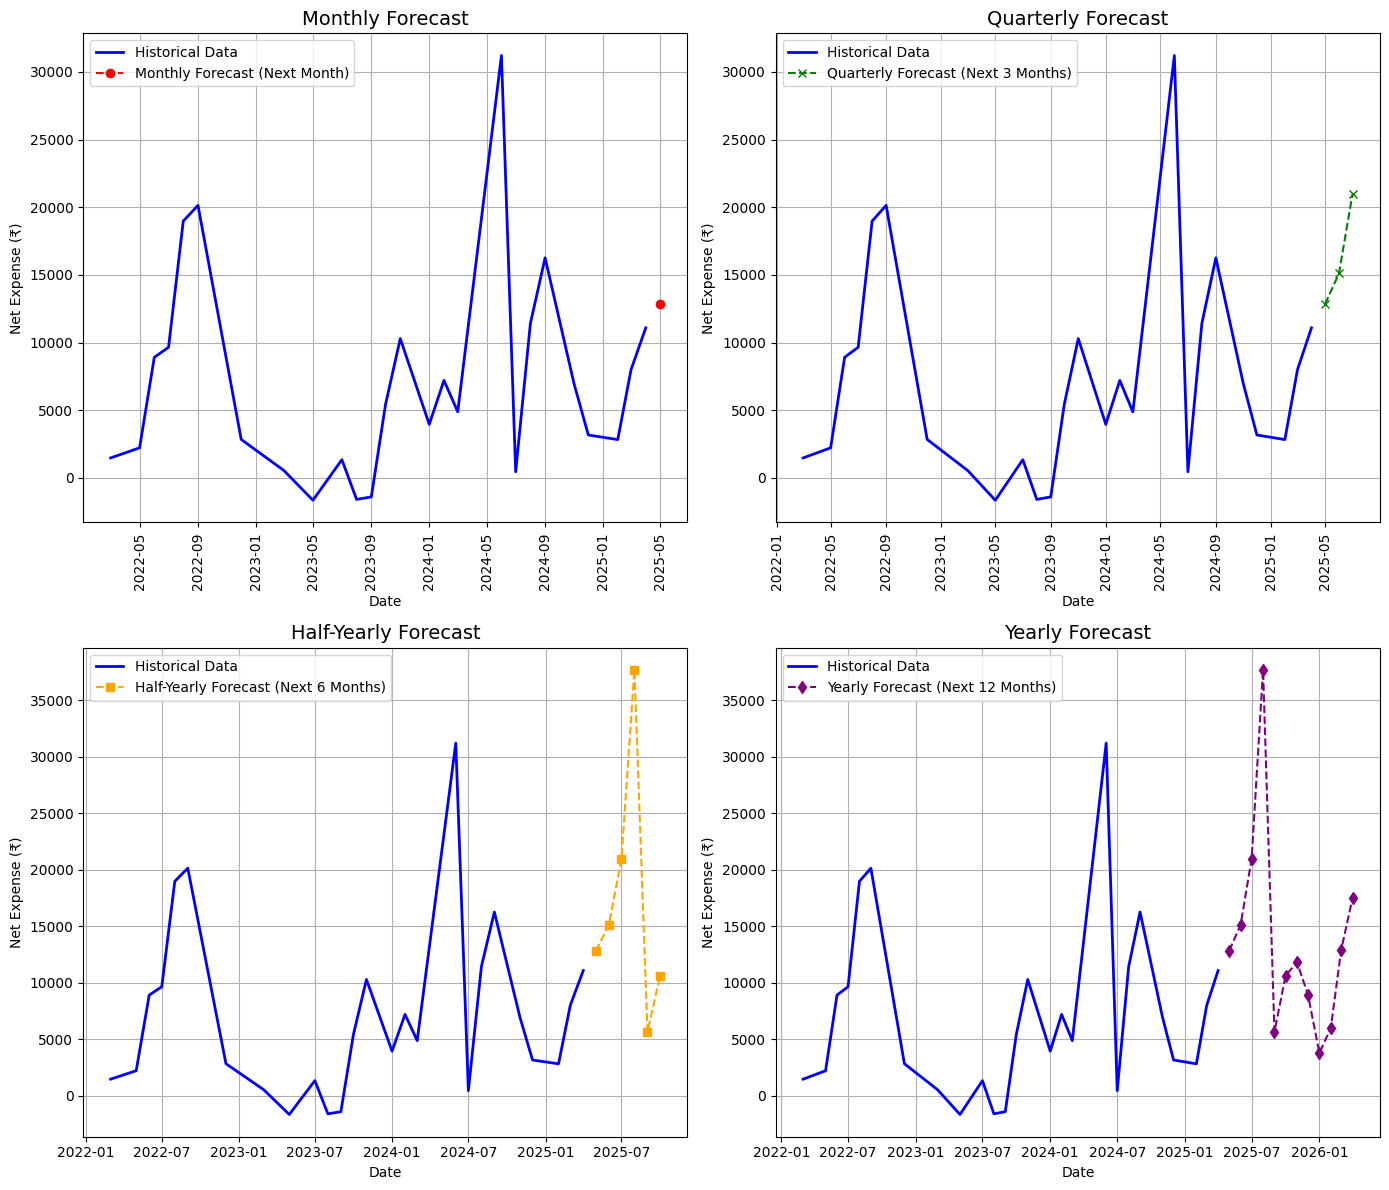

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create forecast index for each forecast period
forecast_index_monthly = pd.date_range(start=filtered_df.index[-1], periods=2, freq='MS')[1:]
forecast_index_quarterly = pd.date_range(start=filtered_df.index[-1], periods=4, freq='MS')[1:]
forecast_index_half_yearly = pd.date_range(start=filtered_df.index[-1], periods=7, freq='MS')[1:]
forecast_index_yearly = pd.date_range(start=filtered_df.index[-1], periods=13, freq='MS')[1:]

# Plot the detailed visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Monthly Forecast Plot
axes[0, 0].plot(filtered_df.index, filtered_df['net_expense'], label="Historical Data", color='blue', linewidth=2)
axes[0, 0].plot(forecast_index_monthly, monthly_forecast, label="Monthly Forecast (Next Month)", color='red', linestyle='--', marker='o')
axes[0, 0].set_title("Monthly Forecast", fontsize=14)
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Net Expense (‚Çπ)")
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=90)

# Quarterly Forecast Plot
axes[0, 1].plot(filtered_df.index, filtered_df['net_expense'], label="Historical Data", color='blue', linewidth=2)
axes[0, 1].plot(forecast_index_quarterly, quarterly_forecast, label="Quarterly Forecast (Next 3 Months)", color='green', linestyle='--', marker='x')
axes[0, 1].set_title("Quarterly Forecast", fontsize=14)
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Net Expense (‚Çπ)")
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].tick_params(axis='x', rotation=90)

# Half-Yearly Forecast Plot
axes[1, 0].plot(filtered_df.index, filtered_df['net_expense'], label="Historical Data", color='blue', linewidth=2)
axes[1, 0].plot(forecast_index_half_yearly, half_yearly_forecast, label="Half-Yearly Forecast (Next 6 Months)", color='orange', linestyle='--', marker='s')
axes[1, 0].set_title("Half-Yearly Forecast", fontsize=14)
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Net Expense (‚Çπ)")
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=90)

# Yearly Forecast Plot
axes[1, 1].plot(filtered_df.index, filtered_df['net_expense'], label="Historical Data", color='blue', linewidth=2)
axes[1, 1].plot(forecast_index_yearly, yearly_forecast, label="Yearly Forecast (Next 12 Months)", color='purple', linestyle='--', marker='d')
axes[1, 1].set_title("Yearly Forecast", fontsize=14)
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Net Expense (‚Çπ)")
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[0, 0].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('training_data_expense_forecast.csv')

# Parse 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Set 'date' as the index
df.set_index('date', inplace=True)

# Group by date and sum debit_amount to remove duplicates
df = df.groupby(df.index).agg({'debit_amount': 'sum'})

# Set frequency to month-end
df = df.asfreq('ME')

# Group by month and sum debit_amount (monthly aggregation)
monthly_data = df['debit_amount'].resample('ME').sum().reset_index()

# Sort by date
monthly_data = monthly_data.sort_values('date')

# Split into train (till Feb 2025) and test (March 2025)
train_data = monthly_data[monthly_data['date'] < '2025-03-01']
test_data = monthly_data[monthly_data['date'] == '2025-03-31']

# Set date as index for training
train_data.set_index('date', inplace=True)

# Define SARIMA parameter combinations for grid search
orders = [(1, 1, 1), (2, 1, 1), (1, 1, 2)]
seasonal_orders = [(1, 1, 1, 12), (0, 1, 1, 12), (1, 0, 1, 12)]

best_score = float('inf')
best_model = None

# Loop over parameter combinations to find the best model
for order in orders:
    for seasonal in seasonal_orders:
        try:
            # Fit SARIMAX model
            model = SARIMAX(train_data['debit_amount'], order=order, seasonal_order=seasonal)
            results = model.fit(disp=False)

            # Forecast the next period
            forecast = results.forecast(steps=1)
            forecast_value = forecast.iloc[0]

            # Get actual value from test data
            actual_value = test_data['debit_amount'].values[0]

            # Calculate Mean Absolute Error (MAE) for model comparison
            mae = abs(forecast_value - actual_value)

            if mae < best_score:
                best_score = mae
                best_model = (order, seasonal, forecast_value)

        except Exception as e:
            print(f"Error with model (Order={order}, Seasonal={seasonal}): {e}")
            continue

# Output the best model found
print("Best model:", best_model)

# Forecast using the best model
order, seasonal, forecast_value = best_model

# Fit the best SARIMA model
best_sarima_model = SARIMAX(train_data['debit_amount'], order=order, seasonal_order=seasonal)
best_results = best_sarima_model.fit(disp=False)

# Forecast for March 2025
forecast = best_results.forecast(steps=1)
forecast_value = forecast.iloc[0]

# Get the actual value from the test set
actual_value = test_data['debit_amount'].values[0]

# Calculate difference and accuracy
difference = abs(actual_value - forecast_value)
accuracy = 100 - (difference / actual_value * 100)

# Print the comparison table
print("Period\t\tForecasted Value\tActual Value\t\tDifference\t\tAccuracy %")
print(f"March 2025\t‚Çπ{forecast_value:,.2f}\t\t‚Çπ{actual_value:,.2f}\t\t‚Çπ{difference:,.2f}\t\t{accuracy:.2f}%")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No freq

Best model: ((1, 1, 2), (0, 1, 1, 12), 5529.173760592302)
Period		Forecasted Value	Actual Value		Difference		Accuracy %
March 2025	‚Çπ5,529.17		‚Çπ7,331.27		‚Çπ1,802.10		75.42%


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the CSV
df = pd.read_csv('training_data_expense_forecast.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Group by quarter and sum debit_amount
quarterly_data = df.groupby(pd.Grouper(key='date', freq='Q'))['debit_amount'].sum().reset_index()

# Sort by date
quarterly_data = quarterly_data.sort_values('date')

# Train data: all quarters up to and including Q4 2024 (i.e., before Q1 2025)
train_quarter = quarterly_data[quarterly_data['date'] < '2025-01-01']

# Test data: Q1 2025
test_quarter = quarterly_data[quarterly_data['date'] == '2025-03-31']  # Q1 ends on Mar 31

# Set date index for SARIMAX
train_quarter.set_index('date', inplace=True)

# Fit SARIMAX (quarterly data, so seasonal_order's period=4)
model = SARIMAX(train_quarter['debit_amount'], order=(1,1,1), seasonal_order=(1,1,1,4))
results = model.fit(disp=False)

# Forecast Q1 2025
forecast_q1 = results.forecast(steps=1)
forecast_value = forecast_q1.iloc[0]

# Actual value from test data
actual_value = test_quarter['debit_amount'].values[0]

# Calculate difference and accuracy
difference = abs(actual_value - forecast_value)
accuracy = 100 - (difference / actual_value * 100)

# Print the comparison
print("Period\t\tForecasted Value\tActual Value\t\tDifference\t\tAccuracy %")
print(f"Q1 2025\t\t‚Çπ{forecast_value:,.2f}\t\t‚Çπ{actual_value:,.2f}\t\t‚Çπ{difference:,.2f}\t\t{accuracy:.2f}%")


<ipython-input-75-99f316b1b342>:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = df.groupby(pd.Grouper(key='date', freq='Q'))['debit_amount'].sum().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Period		Forecasted Value	Actual Value		Difference		Accuracy %
Q1 2025		‚Çπ892,468.44		‚Çπ757,655.84		‚Çπ134,812.60		82.21%


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the CSV
df = pd.read_csv('training_data_expense_forecast.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Group by half-year and sum debit_amount
# Custom half-year periods: Jan‚ÄìJun (H1), Jul‚ÄìDec (H2)
def get_half_year(date):
    return f"H1-{date.year}" if date.month <= 6 else f"H2-{date.year}"

df['half_year'] = df['date'].apply(get_half_year)
half_year_data = df.groupby('half_year')['debit_amount'].sum().reset_index()

# Convert half_year to a proper datetime (we'll use June 30 or Dec 31 for plotting)
half_year_data['date'] = pd.to_datetime(half_year_data['half_year'].str.replace('H1-', '30-06-').str.replace('H2-', '31-12-'), dayfirst=True)

# Sort by date
half_year_data = half_year_data.sort_values('date')

# Train data: all half-years before H1 2025
train_hy = half_year_data[half_year_data['date'] < '2025-01-01']

# Test data: H1 2025
test_hy = half_year_data[half_year_data['half_year'] == 'H1-2025']

# Set date index for training
train_hy.set_index('date', inplace=True)

# Fit SARIMAX (seasonal period = 2 since we have H1 and H2 per year)
model = SARIMAX(train_hy['debit_amount'], order=(1,1,1), seasonal_order=(1,1,1,2))
results = model.fit(disp=False)

# Forecast H1 2025
forecast_h1 = results.forecast(steps=1)
forecast_value = forecast_h1.iloc[0]

# Actual value from test data
actual_value = test_hy['debit_amount'].values[0]

# Calculate difference and accuracy
difference = abs(actual_value - forecast_value)
accuracy = 100 - (difference / actual_value * 100)

# Print the comparison
print("Period\t\tForecasted Value\tActual Value\t\tDifference\t\tAccuracy %")
print(f"H1 2025\t\t‚Çπ{forecast_value:,.2f}\t\t‚Çπ{actual_value:,.2f}\t\t‚Çπ{difference:,.2f}\t\t{accuracy:.2f}%")


Period		Forecasted Value	Actual Value		Difference		Accuracy %
H1 2025		‚Çπ1,353,368.82		‚Çπ894,369.72		‚Çπ458,999.10		48.68%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and parse data
df = pd.read_csv('training_data_expense_forecast.csv')
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Group by year and sum
df['year'] = df['date'].dt.year
yearly_data = df.groupby('year')['debit_amount'].sum().reset_index()

# Separate training (before 2025) and actual for 2025
train_yearly = yearly_data[yearly_data['year'] < 2025]
test_yearly = yearly_data[yearly_data['year'] == 2025]

# Set index to year
train_yearly.set_index('year', inplace=True)

# Fit SARIMAX model (ARIMA(1,0,0) with intercept, no seasonal part)
model = SARIMAX(train_yearly['debit_amount'], order=(0,0,1), trend='c')
results = model.fit(disp=False)

# Forecast for 2025
forecast_2025 = results.forecast(steps=1)
forecast_value = forecast_2025.iloc[0]

# Actual value
actual_value = test_yearly['debit_amount'].values[0]

# Calculate difference and accuracy
difference = abs(actual_value - forecast_value)
accuracy = 100 - (difference / actual_value * 100)

# Print the comparison
print("Period\tForecasted Value\tActual Value\t\tDifference\t\tAccuracy %")
print(f"2025\t‚Çπ{forecast_value:,.2f}\t\t‚Çπ{actual_value:,.2f}\t\t‚Çπ{difference:,.2f}\t\t{accuracy:.2f}%")


Period	Forecasted Value	Actual Value		Difference		Accuracy %
2025	‚Çπ1,407,391.21		‚Çπ894,369.72		‚Çπ513,021.49		42.64%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results w

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


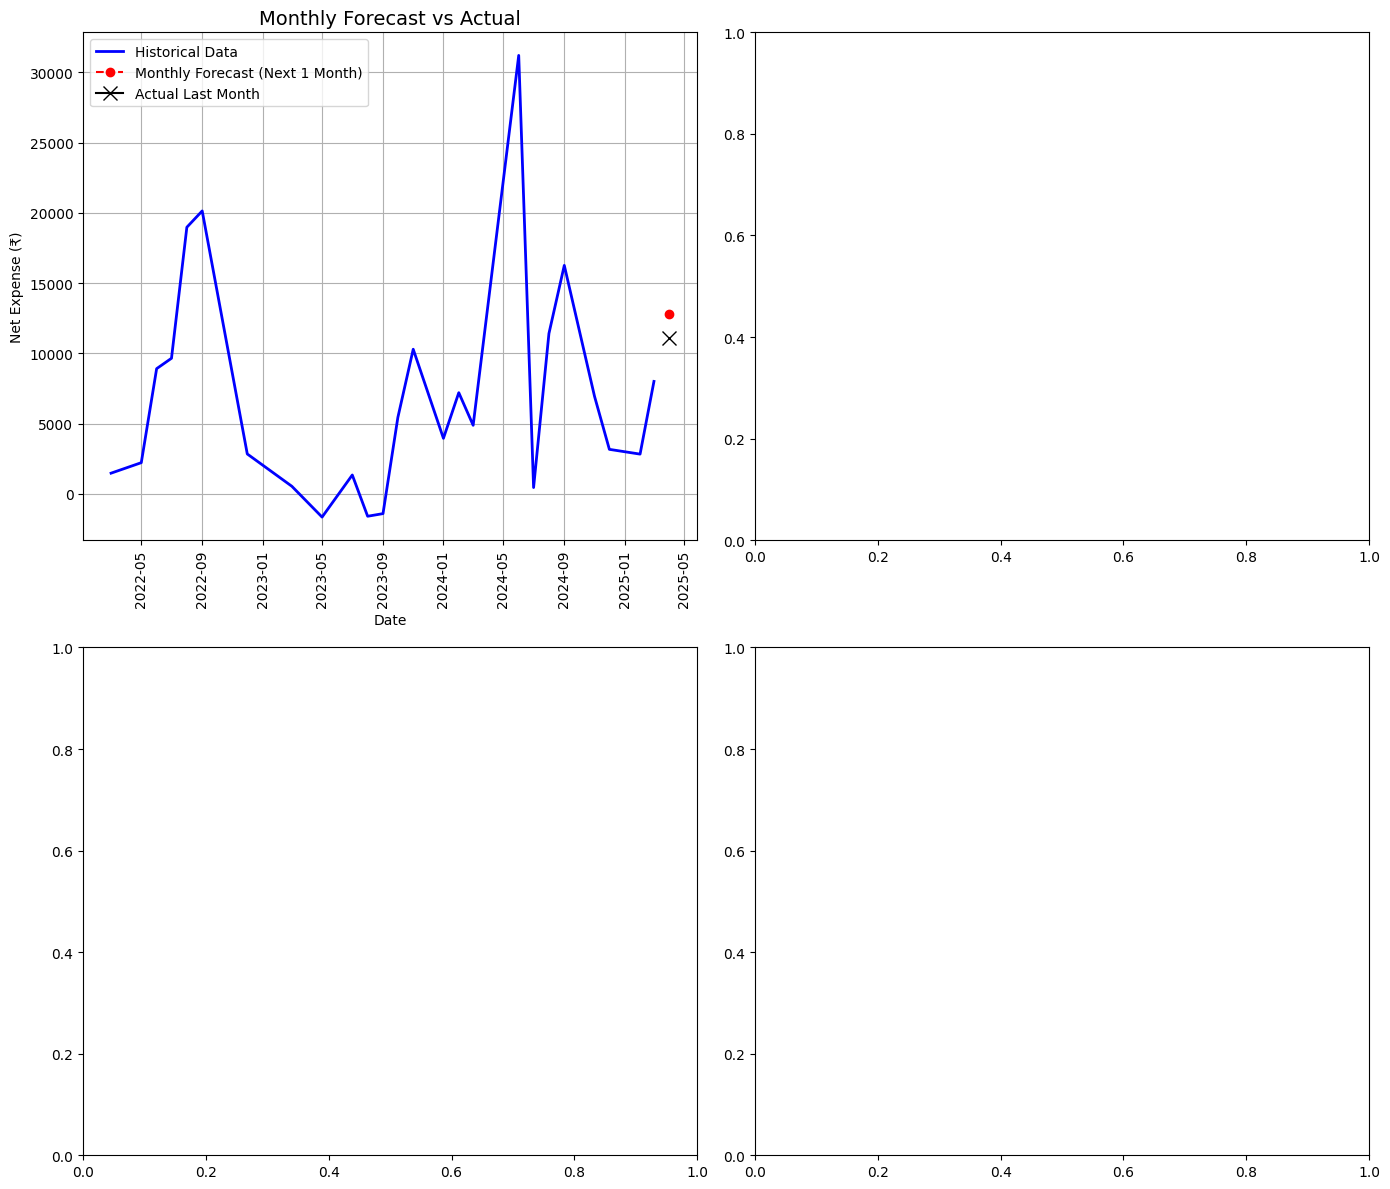

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Exclude the last month (or period) from the data for comparison
train_data = filtered_df.iloc[:-1]  # Remove the last row for training
test_data = filtered_df.iloc[-1:]  # The last month for actual comparison

# Forecast index for the next 1 month (adjust periods as needed)
forecast_index_monthly = pd.date_range(start=train_data.index[-1], periods=2, freq='MS')[1:]

# Use the fitted SARIMAX model to forecast the next 1 month
monthly_forecast = results.forecast(steps=1)  # Forecast only 1 month

# Plot the detailed visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Monthly Forecast Plot (with actual comparison for the last month)
axes[0, 0].plot(train_data.index, train_data['net_expense'], label="Historical Data", color='blue', linewidth=2)
axes[0, 0].plot(forecast_index_monthly, monthly_forecast, label="Monthly Forecast (Next 1 Month)", color='red', linestyle='--', marker='o')

# Highlight the actual last month's value (test data)
axes[0, 0].plot(test_data.index, test_data['net_expense'], label="Actual Last Month", color='black', marker='x', markersize=10)

# Set titles and labels
axes[0, 0].set_title("Monthly Forecast vs Actual", fontsize=14)
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Net Expense (‚Çπ)")
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=90)

# Adjust layout for better view
plt.tight_layout()

# Display the plots
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


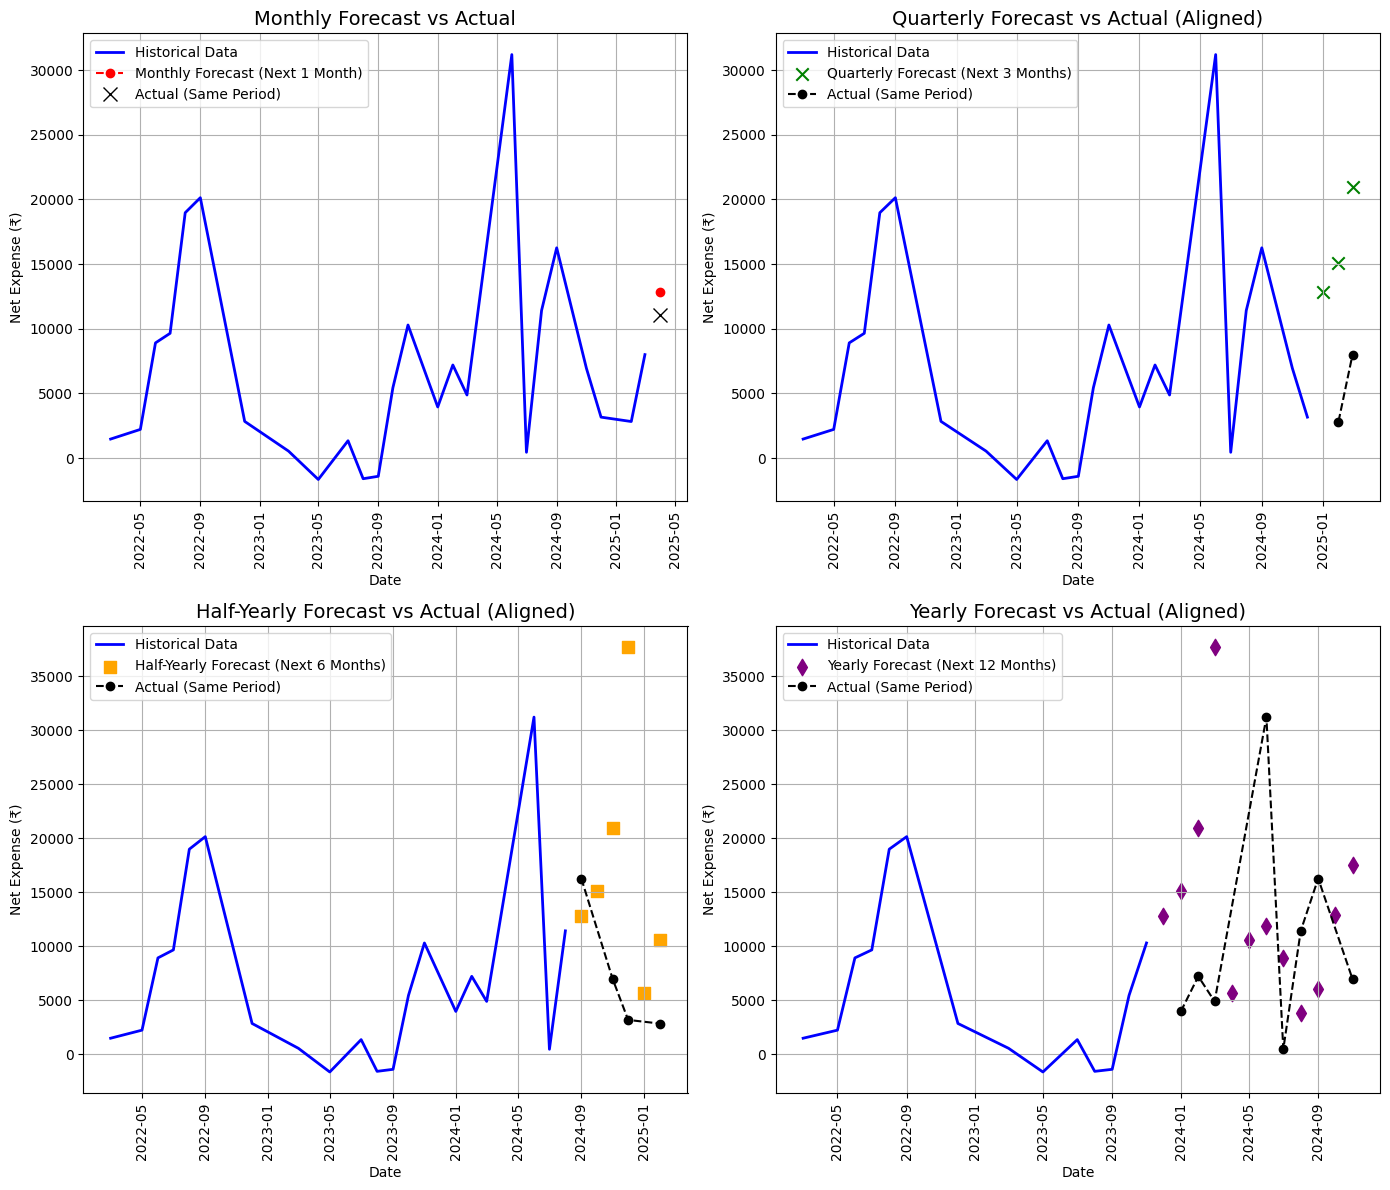

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Forecast index
forecast_index_monthly = pd.date_range(start=filtered_df.index[-2] + pd.DateOffset(months=1), periods=1, freq='MS')
forecast_index_quarterly = pd.date_range(start=filtered_df.index[-4] + pd.DateOffset(months=1), periods=3, freq='MS')
forecast_index_half_yearly = pd.date_range(start=filtered_df.index[-7] + pd.DateOffset(months=1), periods=6, freq='MS')
forecast_index_yearly = pd.date_range(start=filtered_df.index[-13] + pd.DateOffset(months=1), periods=12, freq='MS')

# Forecasts
monthly_forecast = results.forecast(steps=1)
quarterly_forecast = results.forecast(steps=3)
half_yearly_forecast = results.forecast(steps=6)
yearly_forecast = results.forecast(steps=12)

# Actual data for forecast periods (aligned)
actual_data_month = filtered_df.loc[forecast_index_monthly.intersection(filtered_df.index)]
actual_data_quarter = filtered_df.loc[forecast_index_quarterly.intersection(filtered_df.index)]
actual_data_half_year = filtered_df.loc[forecast_index_half_yearly.intersection(filtered_df.index)]
actual_data_year = filtered_df.loc[forecast_index_yearly.intersection(filtered_df.index)]

# Training data (before forecast period)
train_data = filtered_df.iloc[:-1]
train_data_quarter = filtered_df.iloc[:-3]
train_data_half_year = filtered_df.iloc[:-6]
train_data_year = filtered_df.iloc[:-12]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Monthly Forecast
axes[0, 0].plot(train_data.index, train_data['net_expense'], label="Historical Data", color='blue', linewidth=2)
axes[0, 0].plot(forecast_index_monthly, monthly_forecast, label="Monthly Forecast (Next 1 Month)", color='red', linestyle='--', marker='o')
axes[0, 0].plot(actual_data_month.index, actual_data_month['net_expense'], label="Actual (Same Period)", color='black', marker='x', linestyle='', markersize=10)
axes[0, 0].set_title("Monthly Forecast vs Actual", fontsize=14)
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Net Expense (‚Çπ)")
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=90)

# Quarterly Forecast
axes[0, 1].plot(train_data_quarter.index, train_data_quarter['net_expense'], label="Historical Data", color='blue', linewidth=2)
axes[0, 1].scatter(forecast_index_quarterly, quarterly_forecast, label="Quarterly Forecast (Next 3 Months)", color='green', marker='x', s=80)
axes[0, 1].plot(actual_data_quarter.index, actual_data_quarter['net_expense'], label="Actual (Same Period)", color='black', marker='o', linestyle='--', linewidth=1.5)
axes[0, 1].set_title("Quarterly Forecast vs Actual (Aligned)", fontsize=14)
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Net Expense (‚Çπ)")
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].tick_params(axis='x', rotation=90)

# Half-Yearly Forecast
axes[1, 0].plot(train_data_half_year.index, train_data_half_year['net_expense'], label="Historical Data", color='blue', linewidth=2)
axes[1, 0].scatter(forecast_index_half_yearly, half_yearly_forecast, label="Half-Yearly Forecast (Next 6 Months)", color='orange', marker='s', s=70)
axes[1, 0].plot(actual_data_half_year.index, actual_data_half_year['net_expense'], label="Actual (Same Period)", color='black', marker='o', linestyle='--', linewidth=1.5)
axes[1, 0].set_title("Half-Yearly Forecast vs Actual (Aligned)", fontsize=14)
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Net Expense (‚Çπ)")
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].tick_params(axis='x', rotation=90)

# Yearly Forecast
axes[1, 1].plot(train_data_year.index, train_data_year['net_expense'], label="Historical Data", color='blue', linewidth=2)
axes[1, 1].scatter(forecast_index_yearly, yearly_forecast, label="Yearly Forecast (Next 12 Months)", color='purple', marker='d', s=70)
axes[1, 1].plot(actual_data_year.index, actual_data_year['net_expense'], label="Actual (Same Period)", color='black', marker='o', linestyle='--', linewidth=1.5)
axes[1, 1].set_title("Yearly Forecast vs Actual (Aligned)", fontsize=14)
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Net Expense (‚Çπ)")
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


1. Forecast the test period

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have the actual test data and the forecasted data
# Replace these with actual values from your data and forecast
actual = filtered_df['net_expense'][-len(monthly_forecast):]  # Adjust length based on your forecast
predicted = monthly_forecast  # Use the forecast values you have

# Ensure that the actual and predicted values align in terms of their indices
# You may need to adjust or match the index for both actual and predicted

# Calculate MAE, RMSE, and MAPE for the monthly forecast
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"Monthly Forecast Accuracy:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


Monthly Forecast Accuracy:
MAE: 8999.947878346087
RMSE: 9098.873013961831
MAPE: nan%


<ipython-input-39-8c814411fb0b>:15: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


In [ ]:
# Ensure both actual and predicted are numeric values, not datetime
actual_monthly = filtered_df['net_expense'][-len(monthly_forecast):]
predicted_monthly = monthly_forecast

# Similarly, update other forecasts to handle only numeric values
actual_quarterly = filtered_df['net_expense'][-len(quarterly_forecast):]
predicted_quarterly = quarterly_forecast

actual_half_yearly = filtered_df['net_expense'][-len(half_yearly_forecast):]
predicted_half_yearly = half_yearly_forecast

actual_yearly = filtered_df['net_expense'][-len(yearly_forecast):]
predicted_yearly = yearly_forecast

# Calculate MAE, RMSE, and MAPE for the monthly forecast
mae = mean_absolute_error(actual_monthly, predicted_monthly)
rmse = np.sqrt(mean_squared_error(actual_monthly, predicted_monthly))
mape = np.mean(np.abs((actual_monthly - predicted_monthly) / actual_monthly)) * 100

# Calculate accuracy for quarterly, half-yearly, and yearly forecasts
mae_quarterly = mean_absolute_error(actual_quarterly, predicted_quarterly)
rmse_quarterly = np.sqrt(mean_squared_error(actual_quarterly, predicted_quarterly))
mape_quarterly = np.mean(np.abs((actual_quarterly - predicted_quarterly) / actual_quarterly)) * 100

mae_half_yearly = mean_absolute_error(actual_half_yearly, predicted_half_yearly)
rmse_half_yearly = np.sqrt(mean_squared_error(actual_half_yearly, predicted_half_yearly))
mape_half_yearly = np.mean(np.abs((actual_half_yearly - predicted_half_yearly) / actual_half_yearly)) * 100

mae_yearly = mean_absolute_error(actual_yearly, predicted_yearly)
rmse_yearly = np.sqrt(mean_squared_error(actual_yearly, predicted_yearly))
mape_yearly = np.mean(np.abs((actual_yearly - predicted_yearly) / actual_yearly)) * 100

# Print all metrics
print("Monthly Forecast Accuracy:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

print("Quarterly Forecast Accuracy:")
print(f"MAE: {mae_quarterly}")
print(f"RMSE: {rmse_quarterly}")
print(f"MAPE: {mape_quarterly}%")

print("Half-Yearly Forecast Accuracy:")
print(f"MAE: {mae_half_yearly}")
print(f"RMSE: {rmse_half_yearly}")
print(f"MAPE: {mape_half_yearly}%")

print("Yearly Forecast Accuracy:")
print(f"MAE: {mae_yearly}")
print(f"RMSE: {rmse_yearly}")
print(f"MAPE: {mape_yearly}%")


Monthly Forecast Accuracy:
MAE: 8999.947878346087
RMSE: 9098.873013961831
MAPE: nan%
Quarterly Forecast Accuracy:
MAE: 8999.947878346087
RMSE: 9098.873013961831
MAPE: nan%
Half-Yearly Forecast Accuracy:
MAE: 11182.525211107117
RMSE: 16413.710846878937
MAPE: nan%
Yearly Forecast Accuracy:
MAE: 5571.932709800253
RMSE: 6885.546907019921
MAPE: nan%


<ipython-input-41-34a2d1512af4>:18: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((actual_monthly - predicted_monthly) / actual_monthly)) * 100
<ipython-input-41-34a2d1512af4>:23: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape_quarterly = np.mean(np.abs((actual_quarterly - predicted_quarterly) / actual_quarterly)) * 100
<ipython-input-41-34a2d1512af4>:27: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape_half_yearly = np.mean(np.abs((actual_half_yearly - predicted_half_yearly) / actual_half_yearly)) * 100
<ipython-input-41-34a2d1512af4>:31: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape_yearly = np.mean(np.abs((actual_yearly 

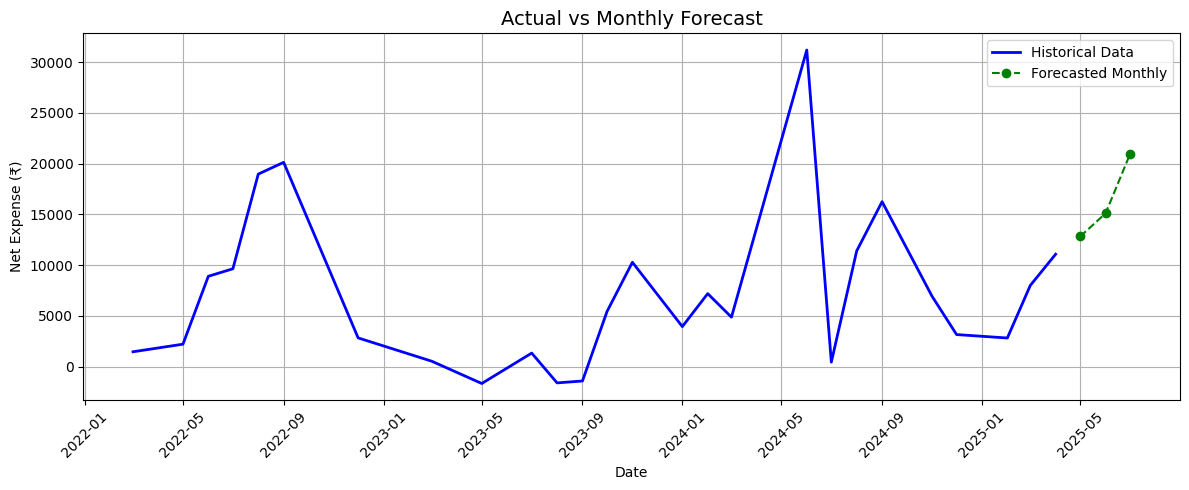

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming filtered_df contains historical data
# Assuming monthly_forecast is the forecast for the next 3 months or so

# Create forecast index for the forecast period
forecast_index_monthly = pd.date_range(start=filtered_df.index[-1], periods=4, freq='MS')[1:]

# Assume test data for the next 3 months (replace with actual data if available)
# For now, let's assume you have actual test data for comparison, e.g., actual_test_monthly
# Example: actual_test_monthly = pd.Series([...], index=forecast_index_monthly)

# Plotting the actual values and forecasted values for comparison
plt.figure(figsize=(12, 5))
plt.plot(filtered_df.index, filtered_df['net_expense'], label='Historical Data', color='blue', linewidth=2)
plt.plot(forecast_index_monthly, monthly_forecast, label='Forecasted Monthly', color='green', linestyle='--', marker='o')

# If you have actual test data, you can plot it as well:
# plt.plot(actual_test_monthly.index, actual_test_monthly, label='Actual Monthly Data', color='orange', linestyle='-', marker='x')

# Title and Labels
plt.title('Actual vs Monthly Forecast', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Net Expense (‚Çπ)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
